# Sprint1 Group2
## General Status of PH_SOA vs ASEAN

In [ ]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.io as pio

In [ ]:
# Load the data
data = pd.read_csv('../data/micro_world.csv', encoding='ISO-8859-1')
data['SOA'] = [ 1 if x == 1 else 0 for x in data['fin16']]


# Define the age bin edges and labels
age_bins = [0, 18, 25, 35, 50, 65, 120]
age_labels = ['below 18', '18-24', '25-34', '35-49', '50-64', '65 and over']

# Convert the age column into age groups using pd.cut()
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

ph_data = data.query('economy == "Philippines"')

In [ ]:
#Determine countries in the dataset that are in Asean region
data['regionwb'].unique()
df_EAP = data[data['regionwb'] == 'East Asia & Pacific (excluding high income)']
df_EAP['economy'].unique()

#add Singapore as it is also an ASEAN country but grouped in High Income region

array(['Cambodia', 'China', 'Indonesia', 'Lao PDR', 'Malaysia',
       'Mongolia', 'Myanmar', 'Philippines', 'Thailand'], dtype=object)

In [ ]:
#Compare PH %SOA vs Asean Counterparts
Asean = ['Singapore', 'Thailand', 'Indonesia', 'Vietnam', 'Philippines', 'Malaysia', 'Cambodia', 'Brunei', 'Lao PDR', 'Myanmar']
data_asean = data.query('economy in @Asean')
data['SOA'] = [ 1 if x == 1 else 0 for x in data['fin16']]

data_asean


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,SOA,age_group
15026,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,122064432,1.923940,1,63.0,1,3,...,4,4.0,2,2.0,1,2,0,0.0,0,50-64
15027,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,138600426,0.667376,1,67.0,1,3,...,4,4.0,2,5.0,2,2,0,0.0,0,65 and over
15028,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,129028091,1.041924,1,41.0,1,2,...,4,4.0,2,5.0,2,2,0,0.0,0,35-49
15029,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,139188390,0.542453,2,45.0,1,5,...,4,2.0,5,1.0,1,2,0,0.0,0,35-49
15030,Cambodia,KHM,East Asia & Pacific (excluding high income),11548637.0,135945774,0.453226,1,30.0,1,5,...,4,4.0,2,2.0,1,1,1,0.0,0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114841,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,119262521,1.472721,1,70.0,3,3,...,4,4.0,2,5.0,1,2,1,0.0,0,65 and over
114842,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,201432535,0.157863,2,53.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,50-64
114843,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,121029659,0.989320,2,40.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,35-49
114844,Thailand,THA,East Asia & Pacific (excluding high income),58246340.0,153317788,0.138057,1,38.0,3,5,...,4,4.0,1,1.0,1,1,1,1.0,1,35-49


In [ ]:
# Create a function to generate needed data frames for each demographic variable
def dem_df(df, dem):
    # Create an empty data frame
    ph_dem = pd.DataFrame()

    # Group the data and apply aggregations
    ph_dem = df.groupby(dem).agg(
        POP=('wpid_random', 'count'),
        SOA=('SOA', 'sum')
    ).reset_index()

    ph_dem['~SOA'] = ph_dem['POP'] - ph_dem['SOA'] # Compute number of people who did not save for old age
    ph_dem['%SOA'] = ph_dem['SOA'] / ph_dem['POP'] * 100 # Compute % of people who saved for old age
    ph_dem['%~SOA'] = ph_dem['~SOA'] / ph_dem['POP'] * 100 # Compute % of people who did not save for old age
  
    return ph_dem

In [ ]:
dem = ['economy', 'economycode', 'regionwb'] 
grp_asean = dem_df(data_asean, dem)
grp_asean = grp_asean.sort_values('%SOA', ascending=False).round(2)
grp_asean

,economy,economycode,regionwb,POP,SOA,~SOA,%SOA,%~SOA
6,Singapore,SGP,High income,1000,666,334,66.60,33.40
7,Thailand,THA,East Asia & Pacific (excluding high income),1017,564,453,55.46,44.54
3,Malaysia,MYS,East Asia & Pacific (excluding high income),1000,535,465,53.50,46.50
5,Philippines,PHL,East Asia & Pacific (excluding high income),1000,416,584,41.60,58.40
4,Myanmar,MMR,East Asia & Pacific (excluding high income),1000,327,673,32.70,67.30
1,Indonesia,IDN,East Asia & Pacific (excluding high income),1062,294,768,27.68,72.32
2,Lao PDR,LAO,East Asia & Pacific (excluding high income),1000,256,744,25.60,74.40
0,Cambodia,KHM,East Asia & Pacific (excluding high income),1000,82,918,8.20,91.80


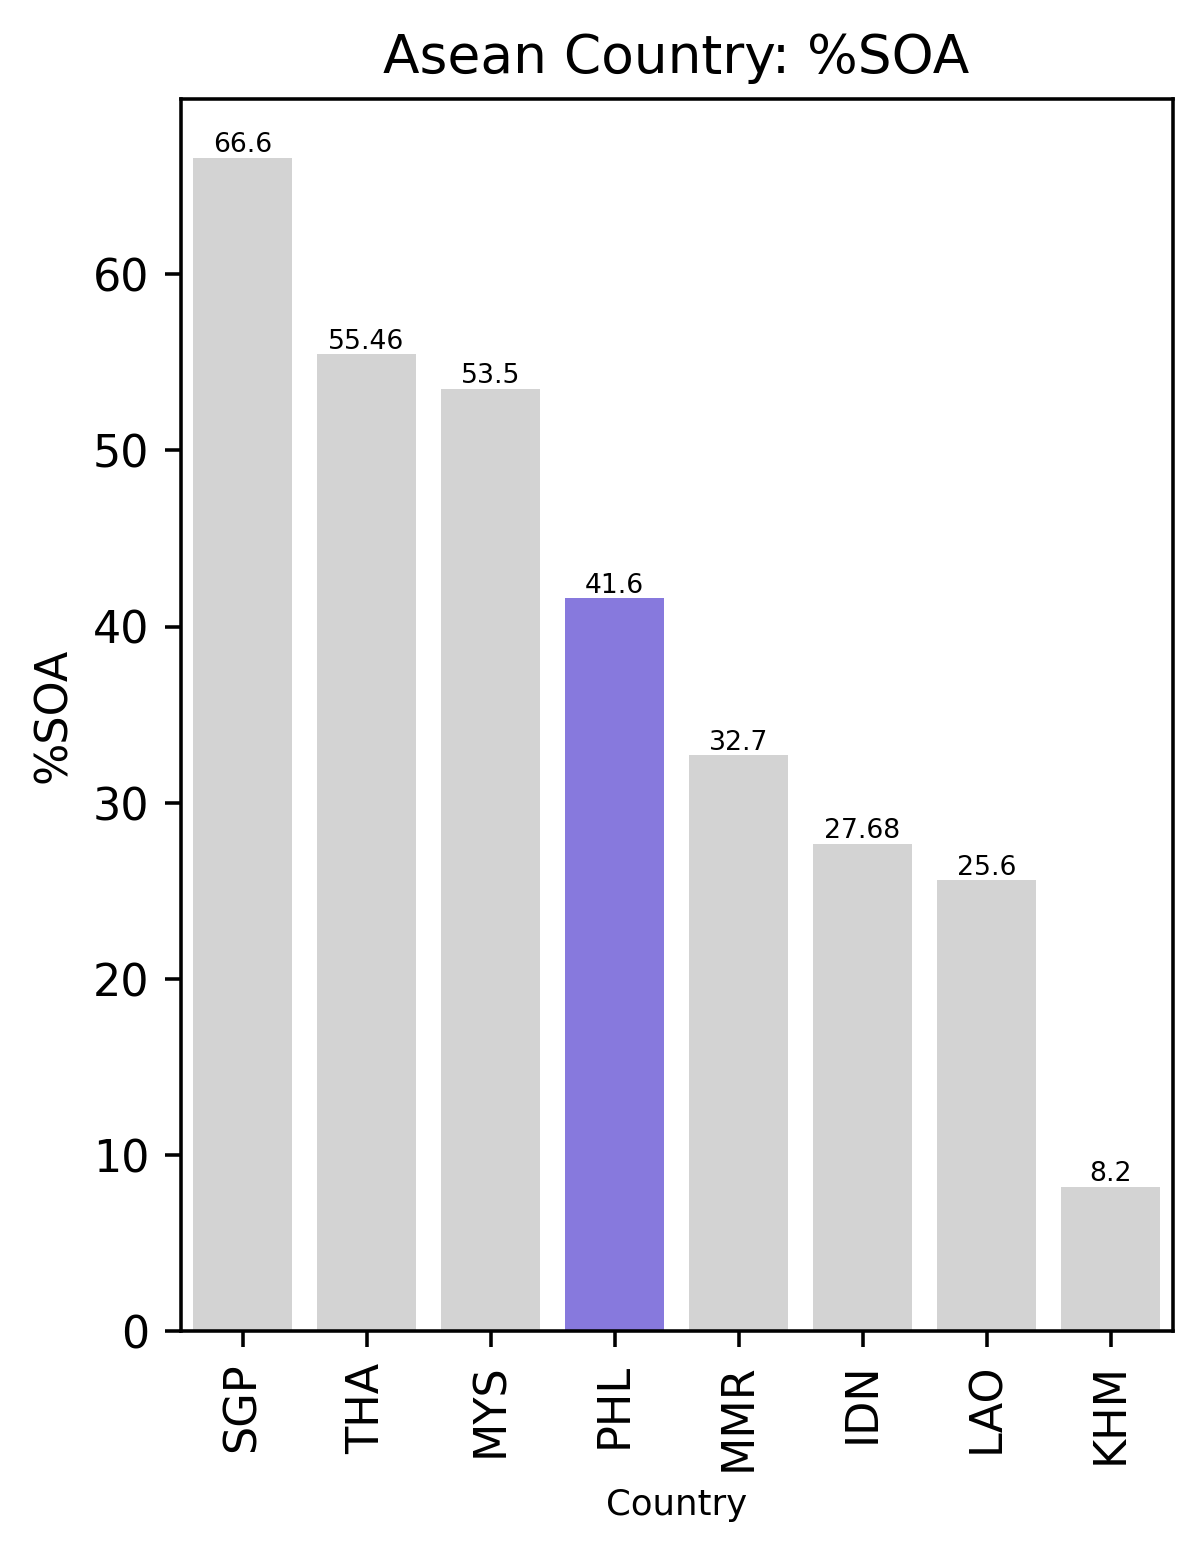

In [ ]:
# create a bar plot for Asean Countries
plt.figure(figsize=(4, 5), dpi=320)
#sns.set_style('whitegrid')
clr = ['mediumslateblue' if x == "PHL" else 'lightgrey' for x in grp_asean['economycode']]  
ax = sns.barplot(x="economycode", y="%SOA", data=grp_asean, palette=clr)
ax.bar_label(ax.containers[0], fontsize=6)

plt.xlabel('Country', fontsize=8)
plt.xticks(rotation=90)
plt.title('Asean Country: %SOA')

#Save
plt.savefig('Asean SOA.png', dpi=320, transparent=True, bbox_inches='tight')


# Clustering
## Cluster PH_data to determine the features of SOA/~SOA 

In [ ]:
#Clean and Prepare data for Clustering
# Filter data for Clustering
ph_data = ph_data.query('fin44a == 1 or fin44a == 2')
cluster=['age_group', 'emp_in', 'inc_q', 'account_fin', 'account_mob', 'saved', 'fin16']
cluster_data = ph_data[cluster]
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,1.0,5,1,1.0,1,1
90751,18-24,1.0,4,1,0.0,1,1
90753,18-24,1.0,5,1,1.0,1,1
90754,25-34,1.0,3,0,0.0,1,2
90755,50-64,1.0,1,1,0.0,0,2
...,...,...,...,...,...,...,...
91745,25-34,1.0,5,1,1.0,0,2
91746,18-24,1.0,3,1,1.0,1,1
91747,below 18,2.0,1,0,0.0,0,2
91748,35-49,1.0,4,1,0.0,0,2


In [ ]:
cluster_data = cluster_data.replace({
    'account_fin':{
    1:'Yes',
    0:'No'
    },
    
     'account_mob':{
    1:'Yes',
    0:'No'
    },
    
    'inc_q':{
    1:'Poorest 20%',
    2:'Next poorest 20%',
    3:'Middle 20%',
    4:'Next richest 20%',
    5:'Richest 20%',
    },
    
    'emp_in':{
    1:'Yes',
    2:'No'
    },
    
    'saved':{
    1:'Yes',
    0:'No'
    },

    
    'fin16':{
    1: 'Yes',
    2: 'No',
    3: 'No',
    4: 'No'
    }
    }
)

In [ ]:
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes
90754,25-34,Yes,Middle 20%,No,No,Yes,No
90755,50-64,Yes,Poorest 20%,Yes,No,No,No
...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes
91747,below 18,No,Poorest 20%,No,No,No,No
91748,35-49,Yes,Next richest 20%,Yes,No,No,No


In [ ]:
# Check nulls
cluster_data.isna().sum()

age_group      1
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [ ]:
#Drop null
cluster_data = cluster_data.dropna(subset=['age_group'])
cluster_data.isna().sum()

age_group      0
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [ ]:
# One-hot encode categorical columns
#cluster_data_encoded = pd.get_dummies(cluster_data)
#cluster_data_encoded

In [ ]:
# Calculate silhouette scores for different number of clusters
#silhouette_scores = []
#for n_clusters in range(2, 7):
#    kmodes = KModes(n_clusters=n_clusters, init='random', n_init=5, random_state=42)
#    labels = kmodes.fit_predict(cluster_data_encoded)
#    silhouette_scores.append(silhouette_score(cluster_data_encoded, labels))

# Create DataFrame
#results_df = pd.DataFrame({'Number of clusters': range(2, 7), 'Silhouette score': silhouette_scores})
#results_df

In [ ]:

# Plot Silhouette scores
#plt.plot(results_df['Number of clusters'], results_df['Silhouette score'], marker='o')
#plt.xlabel('Number of clusters')
#plt.ylabel('Silhouette score')
#plt.title('Silhouette scores for different numbers of clusters')
#plt.show()


In [ ]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42,
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  return kmodes.labels_

In [ ]:
# Run our K-Modes function for n_clusters
labels = run_kmodes(
  n_clusters=5,
  cluster_data=cluster_data
)

In [ ]:
labels

array([1, 4, 1, 3, 2, 0, 2, 3, 0, 3, 1, 2, 1, 3, 1, 3, 4, 0, 2, 4, 0, 3,
       1, 4, 2, 1, 3, 3, 0, 1, 3, 2, 0, 1, 1, 0, 3, 2, 4, 2, 1, 3, 4, 0,
       1, 1, 2, 0, 1, 4, 4, 3, 1, 0, 0, 0, 3, 0, 1, 0, 2, 3, 2, 0, 0, 1,
       2, 1, 4, 1, 3, 0, 0, 0, 0, 3, 1, 0, 0, 4, 2, 2, 0, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 3, 2, 2, 4, 0, 1, 4, 0, 2, 4, 3, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 3, 3, 2, 4, 2, 0, 0, 1, 0, 0, 3, 4, 3, 3, 0, 0, 1, 3, 2,
       1, 2, 1, 3, 4, 4, 3, 3, 2, 4, 1, 2, 4, 1, 1, 1, 1, 1, 2, 3, 0, 1,
       4, 0, 1, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 3, 0, 4, 4, 1, 4,
       0, 3, 0, 0, 1, 0, 1, 0, 4, 4, 1, 0, 4, 4, 2, 1, 0, 0, 2, 4, 0, 4,
       1, 4, 4, 0, 2, 0, 2, 2, 0, 2, 1, 0, 4, 1, 0, 1, 3, 3, 3, 4, 4, 0,
       1, 0, 0, 0, 1, 4, 0, 1, 0, 2, 4, 2, 4, 0, 0, 1, 2, 3, 3, 0, 3, 1,
       2, 2, 0, 1, 0, 2, 0, 4, 2, 0, 0, 1, 2, 0, 1, 1, 4, 4, 3, 2, 0, 1,
       2, 0, 3, 2, 2, 1, 1, 4, 3, 2, 2, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1,
       3, 1, 0, 0, 1, 0, 2, 0, 3, 4, 1, 1, 3, 2, 3,

In [ ]:
# Append the labels to cluster data
cluster_data['labels'] = labels


C:\Users\XIAOMI\AppData\Local\Temp\ipykernel_22336\4094440874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['labels'] = labels


In [ ]:
# Show data
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90754,25-34,Yes,Middle 20%,No,No,Yes,No,3
90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2
...,...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1
91747,below 18,No,Poorest 20%,No,No,No,No,0
91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2


In [ ]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode).sort_values(by='fin16')

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
labels,,,,,,,
0,18-24,No,Middle 20%,No,No,No,No
2,35-49,Yes,Next poorest 20%,No,No,No,No
3,25-34,Yes,Middle 20%,Yes,No,Yes,No
1,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
4,35-49,Yes,Next richest 20%,Yes,No,Yes,Yes


In [23]:
ph_data = ph_data.dropna(subset=['age_group'])
ph_data['cluster'] = labels

In [24]:
ph_data['cluster']

90750    1
90751    4
90753    1
90754    3
90755    2
        ..
91745    1
91746    1
91747    0
91748    2
91749    4
Name: cluster, Length: 885, dtype: uint16

In [26]:
ph_data.groupby('cluster').count()['wpid_random'] / len(ph_data) * 100

cluster
0    27.231638
1    26.327684
2    18.418079
3    14.576271
4    13.446328
Name: wpid_random, dtype: float64

In [25]:
ph_data_c3 = ph_data[
    ph_data['cluster'] == 3
]
ph_data_c3

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,SOA,age_group,cluster
90754,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,139964446,1.165876,1,33.0,2,3,...,4.0,2,5.0,1,1,0,0.0,0,25-34,3
90758,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,177313423,1.374934,2,35.0,2,4,...,4.0,2,5.0,1,1,0,0.0,0,25-34,3
90760,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,119756035,0.980779,1,31.0,2,3,...,4.0,4,5.0,1,1,0,0.0,0,25-34,3
90765,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,155968703,1.512620,1,31.0,2,1,...,4.0,4,5.0,1,2,1,0.0,0,25-34,3
90767,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,204810361,0.388625,1,30.0,2,3,...,4.0,2,3.0,1,1,0,0.0,0,25-34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91701,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,172304775,0.229156,2,39.0,2,3,...,4.0,2,1.0,1,1,1,1.0,0,35-49,3
91720,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,166293235,1.835753,1,29.0,2,3,...,4.0,2,5.0,1,1,0,0.0,1,25-34,3
91724,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,173104088,0.273713,1,19.0,2,2,...,2.0,2,3.0,1,1,1,0.0,0,18-24,3
91731,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,134010346,0.348429,2,18.0,2,3,...,4.0,2,1.0,1,2,1,0.0,1,below 18,3


In [73]:
# How worried they are about old age

c3_woa = ph_data_c3.groupby('fin44a').agg(count=('wpid_random', 'count'))
c3_woa

,count
fin44a,
1,74
2,55


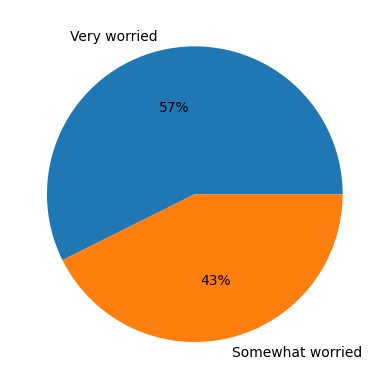

In [74]:
plt.pie(c3_woa['count'], labels = [
    'Very worried', 'Somewhat worried'], autopct='%.0f%%')
plt.show()

In [36]:
# How many saved in the past year in cluster 3 - for confirming only

c3_saved = ph_data_c3.groupby('saved').agg(count=('wpid_random', 'count'))
c3_saved

,count
saved,
0,25
1,104


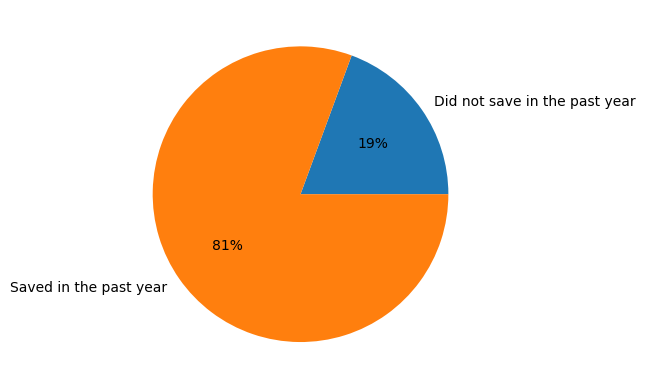

In [38]:
plt.pie(c3_saved['count'], labels = [
    'Did not save in the past year', 'Saved in the past year'], autopct='%.0f%%')
plt.show()

In [30]:
# Explore what cluster 3 is saving for if they saved in the past year but not for old age

c3_emergency = ph_data_c3.groupby('fin24').agg(count=('wpid_random', 'count')) # Main source of emergency funds in 30 days
c3_emergency

,count
fin24,
1,21
2,52
3,30
4,15
5,7
6,4


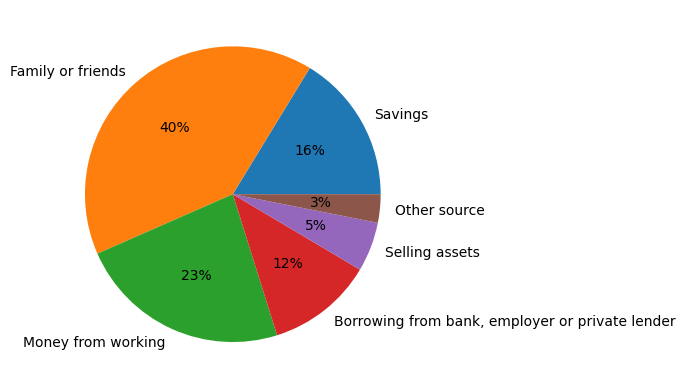

In [32]:
plt.pie(c3_emergency['count'], labels = [
    'Savings', 'Family or friends', 'Money from working', 'Borrowing from bank, employer or private lender', 'Selling assets', 'Other source'], autopct='%.0f%%')
plt.show()

In [33]:
c3_emergency30 = ph_data_c3.groupby('fin24a').agg(count=('wpid_random', 'count')) # Difficulty of emergency funds in 30 days
c3_emergency30

,count
fin24a,
1.0,59
2.0,55
3.0,15


In [67]:
c3_emergency7 = ph_data_c3.groupby('fin24b').agg(count=('wpid_random', 'count')) # Difficulty of emergency funds in 30 days
c3_emergency7

,count
fin24b,
1.0,89
2.0,34
3.0,6


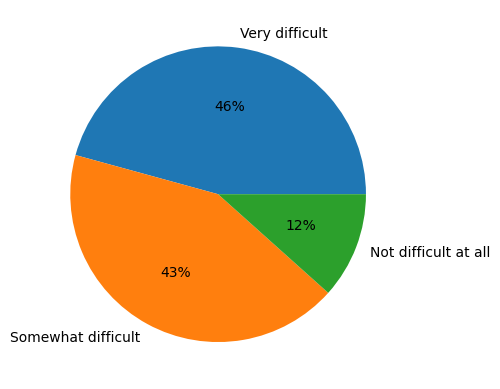

In [34]:
plt.pie(c3_emergency30['count'], labels = [
    'Very difficult', 'Somewhat difficult', 'Not difficult at all'], autopct='%.0f%%')
plt.show()

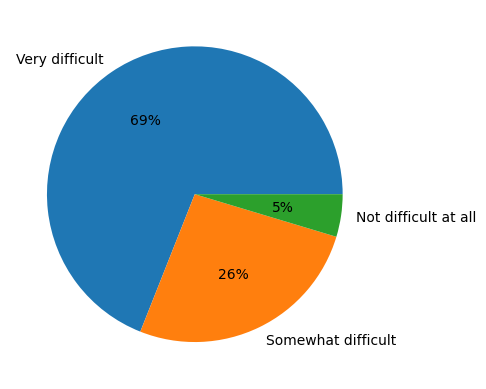

In [68]:
plt.pie(c3_emergency7['count'], labels = [
    'Very difficult', 'Somewhat difficult', 'Not difficult at all'], autopct='%.0f%%')
plt.show()

In [ ]:
# Insights
## It looks like cluster 3 people are not necessarily saving for emergency. This suggests they might be saving for other things aside from old age and emergency funds.
### Unfortunately, there aren't a lot more variables related to saving in the dataset. But BSP report has reasons for saving - goals, immediate expenses.

In [62]:
# What are they most financially worried about? This may tell us what they are saving for.

c3_worry = ph_data_c3.groupby('fin45').agg(count=('wpid_random', 'count')).reset_index()
c3_worry

,fin45,count
0,1.0,14
1,2.0,79
2,3.0,23
3,4.0,11


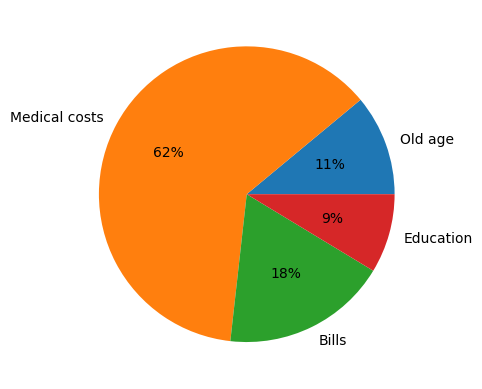

In [63]:
plt.pie(c3_worry['count'], labels = [
    'Old age', 'Medical costs', 'Bills', 'Education'], autopct='%.0f%%')
plt.show()

In [ ]:
# Insights
## Possible that medical costs are what they are saving for.
## Bills can be considered immediate expenses.
## Old age ranks low compared to other expenses. It does not seem like a priority.

In [64]:
# Do they have debts? - Maybe they are saving for this

c3_borrowed = ph_data_c3.groupby('borrowed').agg(count=('wpid_random', 'count')).reset_index()

,borrowed,count
0,0,41
1,1,88


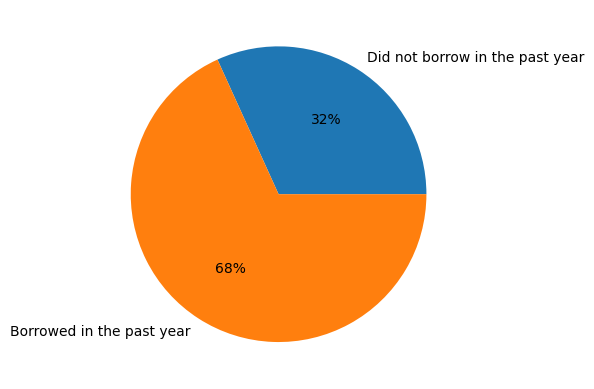

In [66]:
plt.pie(c3_borrowed['count'], labels = [
    'Did not borrow in the past year', 'Borrowed in the past year'], autopct='%.0f%%')
plt.show()

In [ ]:
# Insights
## They might be saving for debts.

In [ ]:
# Show the income level variation again - This might suggest that income contributes to saving or not saving for old age.
# While they can save for other things, they do not have enough to save for everything they need or want. Old age is not a priority so the money they have to save does not reach it.

In [71]:
# Explore what accounts they use to save

c3_savedfin = ph_data_c3.groupby('fin17a').agg(fin=('wpid_random', 'count')).reset_index() # saved using financial institution
c3_savedfin

,fin17a,fin
0,1,28
1,2,101


In [55]:
c3_savedmob = ph_data_c3.groupby('fin17a1').agg(mob=('wpid_random', 'count')).reset_index() # saved using mobile account
c3_savedmob # many NAs for this variable

,fin17a1,mob
0,1.0,3
1,2.0,12


In [72]:
c3_savedinformal = ph_data_c3.groupby('fin17b').agg(informal=('wpid_random', 'count')).reset_index() # saved using informal savings club
c3_savedinformal

,fin17b,informal
0,1.0,17
1,2.0,112


In [ ]:
# Create a bar chart for types of account for saving

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ph_savedold_age['age_group']
    y = ph_savedold_age['%savedold']

# plotting the bar chart
plt.bar(c3_saved_acc['age_group'],c3_saved_acc['%saved'],color='b')
plt.bar(c3_saved_acc['age_group'],c3_saved_acc['%not_saved'],bottom=ph_savedold_age['%savedold'],color='grey')

addlabels(ph_saveold_age['age_group'],ph_savedold_age['%savedold'].round(2))

# Set title
plt.title('Accounts used for saving')

# Set labels
plt.xlabel('Type of account')
plt.ylabel('% who saved')

# Rotate x labels
plt.xticks(rotation=45)

# Save as transparent png
# plt.savefig('by_agegroup.png', dpi=320,transparent=True, bbox_inches='tight')

# Show figure
plt.show()

In [ ]:
# Insights
## This tells us that most of them do not use financial institutions, mobile account and informal savings club for saving. BSP report says that 52% of Filipinos still save at home.
## Saving at home is not safe [insert reference]. FIs, mobile banks should do more to make saving easier or something like that.